In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os

In [14]:
df = pd.read_csv("/content/data.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [16]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [24]:
missing_values= df.isnull().sum()
missing_values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [17]:
svm = SVC()

In [18]:
x=df.drop(['Bankrupt?'],axis=1)
y=df['Bankrupt?']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)

In [19]:
# Define modified parameter grid for hyperparameter tuning
param_grid_modified = {'C': [0.001, 0.01, 0.1, 1, 10],  # Include smaller values of C
                      'gamma': [10, 100, 1000],           # Include larger values of gamma
                      'kernel': ['rbf', 'sigmoid']}       # Include 'sigmoid' kernel

# Perform grid search with cross-validation using the modified parameter grid
grid_search_modified = GridSearchCV(svm, param_grid_modified, cv=5)
grid_search_modified.fit(x_train, y_train)

# Get best hyperparameters
best_params_modified = grid_search_modified.best_params_

In [20]:
# Train SVM model with best hyperparameters
best_svm = SVC(**best_params_modified)
best_svm.fit(x_train, y_train)

SVC(C=0.001, gamma=10)

In [21]:
# Predictions
y_pred_train = best_svm.predict(x_train)
y_pred_test = best_svm.predict(x_test)

In [22]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on training set: 0.9682859761686526
Accuracy on test set: 0.9655425219941349


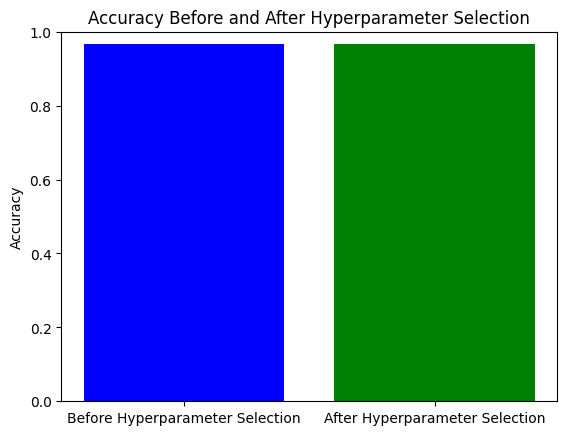

In [23]:
# Plotting accuracy before and after hyperparameter selection
labels = ['Before Hyperparameter Selection', 'After Hyperparameter Selection']
accuracy_scores = [svm.fit(x_train, y_train).score(x_test, y_test), best_svm.score(x_test, y_test)]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Hyperparameter Selection')
plt.ylim(0, 1.0)
plt.show()